In [ ]:
library(ggplot2)      # Core plotting functionality
library(ggalluvial)   # Alluvial plot creation
library(dplyr)        # Data manipulation
library(RColorBrewer) # Color palette generation
library(gridExtra)    # Grid-based plot arrangements
library(rlang)        # Programming tools for R
library(tidyr)        # Data reshaping (pivot functions)
library(patchwork)    # Combining multiple plots into panels

## absolute cells/uL

### median line

In [ ]:
options(repr.plot.width = 24, repr.plot.height = 16)

library(ggplot2)      # Core plotting functionality
library(ggalluvial)   # Alluvial plot creation
library(dplyr)        # Data manipulation
library(RColorBrewer) # Color palette generation
library(gridExtra)    # Grid-based plot arrangements
library(rlang)        # Programming tools for R
library(tidyr)        # Data reshaping (pivot functions)
library(patchwork)    # Combining multiple plots into panels

df <- read.csv('/home/workspace/pbmc_flow/data/FH PBMC flow data T cells -Absolute counts.csv')
df <- df[df$'Absolute.cell.uL' != '#VALUE!',]
df[['Absolute.cell.uL']] <- as.numeric(df[['Absolute.cell.uL']])

celltypes <- unique(df$population)
non_tcells <- c('Viable Cells', 'CD45+', 'B cells', 'Myeloid cells', 'NK Cells', 'CD56 High NK', 'CD56 low NK')
tcells <- celltypes[!celltypes %in% non_tcells]

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0", 
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7", 
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

timepoints <- names(timepoint_labels)

df$Visit <- factor(df$Visit, levels = timepoints)
df$Year <- ifelse(grepl("Year 1", df$Visit), "Year 1", "Year 2")

plots <- lapply(seq_along(tcells), function(x) {
    df_subset <- df[df$population == tcells[[x]], ]
    
    p <- ggplot(df_subset, aes(x = Visit, y = Absolute.cell.uL, color = Response)) +
        geom_boxplot() +
        geom_jitter(position = position_jitterdodge(dodge.width = 0.75, jitter.width = 0), alpha = 0.6) +
        stat_summary(fun = median, geom = "line", aes(group = interaction(Response, Year)), 
                     position = position_dodge(width = 0.75), size = 1) +
        scale_x_discrete(labels = timepoint_labels) +
        scale_y_log10() +
        theme_minimal() +
        theme(
            axis.text.x = element_text(angle = 90, hjust = 1),
            axis.title.x = element_text(margin = margin(t = 30), size = 20, face = "bold"),
            axis.title.y = element_text(size = 20, face = "bold", margin = margin(r = 20)),
            plot.margin = margin(t = 10, r = 5, b = 20, l = 5)
        ) +
        labs(title = paste(tcells[[x]]), y = "Log10 Absolute cell count (cells/uL)") +
        scale_fill_brewer(type = "qual", palette = "Set2")
    
    return(p)
})

wrap_plots(plots, ncol = 5) + 
    plot_layout(guides = "collect", axis_title = "collect") +
    plot_annotation(
        title = "T Cells",
        theme = theme(plot.title = element_text(hjust = 0.5, size = 25, face = "bold"))
    )

### individual lines & median line

In [ ]:
options(repr.plot.width = 24, repr.plot.height = 16)

library(ggplot2)      # Core plotting functionality
library(ggalluvial)   # Alluvial plot creation
library(dplyr)        # Data manipulation
library(RColorBrewer) # Color palette generation
library(gridExtra)    # Grid-based plot arrangements
library(rlang)        # Programming tools for R
library(tidyr)        # Data reshaping (pivot functions)
library(patchwork)    # Combining multiple plots into panels

df <- read.csv('/home/workspace/pbmc_flow/data/FH PBMC flow data T cells -Absolute counts.csv')
df <- df[df$'Absolute.cell.uL' != '#VALUE!',]
df[['Absolute.cell.uL']] <- as.numeric(df[['Absolute.cell.uL']])

celltypes <- unique(df$population)
non_tcells <- c('Viable Cells', 'CD45+', 'B cells', 'Myeloid cells', 'NK Cells', 'CD56 High NK', 'CD56 low NK')
tcells <- celltypes[!celltypes %in% non_tcells]

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0", 
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7", 
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

timepoints <- names(timepoint_labels)

df$Visit <- factor(df$Visit, levels = timepoints)
df$Year <- ifelse(grepl("Year 1", df$Visit), "Year 1", "Year 2")

plots <- lapply(seq_along(tcells), function(x) {
    df_subset <- df[df$population == tcells[[x]], ]
    
    # Manually calculate x positions for each response group
    df_subset$x_pos <- as.numeric(df_subset$Visit)
    df_subset$x_pos[df_subset$Response == "Non responder"] <- df_subset$x_pos[df_subset$Response == "Non responder"] - 0.2
    df_subset$x_pos[df_subset$Response == "Responder"] <- df_subset$x_pos[df_subset$Response == "Responder"] + 0.2
    
    p <- ggplot(df_subset, aes(x = x_pos, y = Absolute.cell.uL, color = Response)) +
        geom_boxplot(aes(group = interaction(Visit, Response)), width = 0.3) +
        geom_point(alpha = 0.6) +
        geom_line(aes(group = interaction(Subject, Response, Year)), alpha = 0.3, size = 0.5) +
        stat_summary(fun = median, geom = "line", aes(group = interaction(Response, Year)), size = 1) +
        scale_x_continuous(breaks = 1:8, labels = timepoint_labels) +
        scale_y_log10() +
        theme_minimal() +
        theme(
            axis.text.x = element_text(angle = 90, hjust = 1),
            axis.title.x = element_text(margin = margin(t = 30), size = 20, face = "bold"),
            axis.title.y = element_text(size = 20, face = "bold", margin = margin(r = 20)),
            plot.margin = margin(t = 10, r = 5, b = 20, l = 5)
        ) +
        labs(title = paste(tcells[[x]]), y = "Log10 Absolute cell count (cells/uL)") +
        scale_fill_brewer(type = "qual", palette = "Set2")
    
    return(p)
})

wrap_plots(plots, ncol = 5) + 
    plot_layout(guides = "collect", axis_title = "collect") +
    plot_annotation(
        title = "T Cells",
        theme = theme(plot.title = element_text(hjust = 0.5, size = 25, face = "bold"))
    )

## frequency clr

### level 1


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


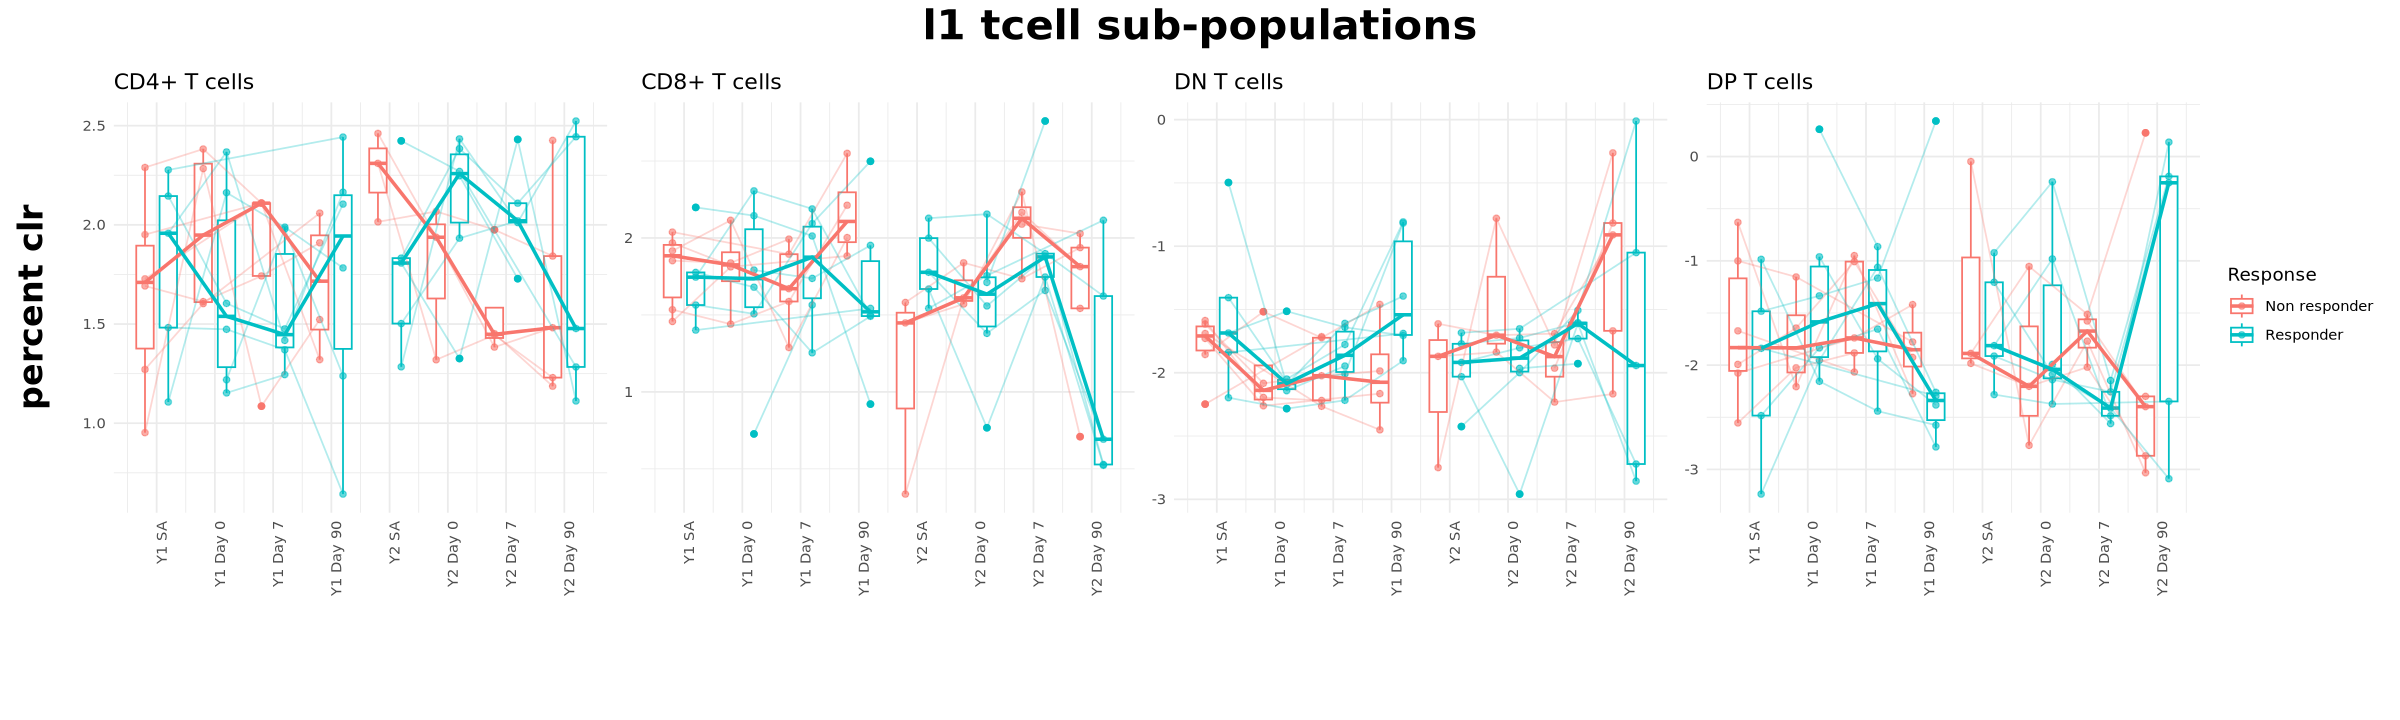

In [1]:
options(repr.plot.width = 20, repr.plot.height = 6)

library(ggplot2)      # Core plotting functionality
library(ggalluvial)   # Alluvial plot creation
library(dplyr)        # Data manipulation
library(RColorBrewer) # Color palette generation
library(gridExtra)    # Grid-based plot arrangements
library(rlang)        # Programming tools for R
library(tidyr)        # Data reshaping (pivot functions)
library(patchwork)    # Combining multiple plots into panels

df <- read.csv('/home/workspace/pbmc_flow/data/l1_frequency_clr_results.csv')

celltypes <- unique(df$population)

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0", 
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7", 
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

timepoints <- names(timepoint_labels)

df$Visit <- factor(df$Visit, levels = timepoints)
df$Year <- ifelse(grepl("Year 1", df$Visit), "Year 1", "Year 2")

plots <- lapply(seq_along(celltypes), function(x) {
    df_subset <- df[df$population == celltypes[[x]], ]
    
    df_subset$x_pos <- as.numeric(df_subset$Visit)
    df_subset$x_pos[df_subset$Response == "Non responder"] <- df_subset$x_pos[df_subset$Response == "Non responder"] - 0.2
    df_subset$x_pos[df_subset$Response == "Responder"] <- df_subset$x_pos[df_subset$Response == "Responder"] + 0.2
    
    p <- ggplot(df_subset, aes(x = x_pos, y = percent_clr, color = Response)) +
        geom_boxplot(aes(group = interaction(Visit, Response)), width = 0.3) +
        geom_point(alpha = 0.6) +
        geom_line(aes(group = interaction(Subject, Response, Year)), alpha = 0.3, size = 0.5) +
        stat_summary(fun = median, geom = "line", aes(group = interaction(Response, Year)), size = 1) +
        scale_x_continuous(breaks = 1:8, labels = timepoint_labels) +
        theme_minimal() +
        theme(
            axis.text.x = element_text(angle = 90, hjust = 1),
            axis.title.x = element_text(margin = margin(t = 30), size = 20, face = "bold"),
            axis.title.y = element_text(size = 20, face = "bold", margin = margin(r = 20)),
            plot.margin = margin(t = 10, r = 5, b = 20, l = 5)
        ) +
        labs(title = paste(celltypes[[x]]), y = "percent clr", x = "") +
        scale_fill_brewer(type = "qual", palette = "Set2")
    
    return(p)
})

wrap_plots(plots, ncol = 4) + 
    plot_layout(guides = "collect", axis_title = "collect") +
    plot_annotation(
        title = "l1 tcell sub-populations",
        theme = theme(plot.title = element_text(hjust = 0.5, size = 25, face = "bold"))
    )

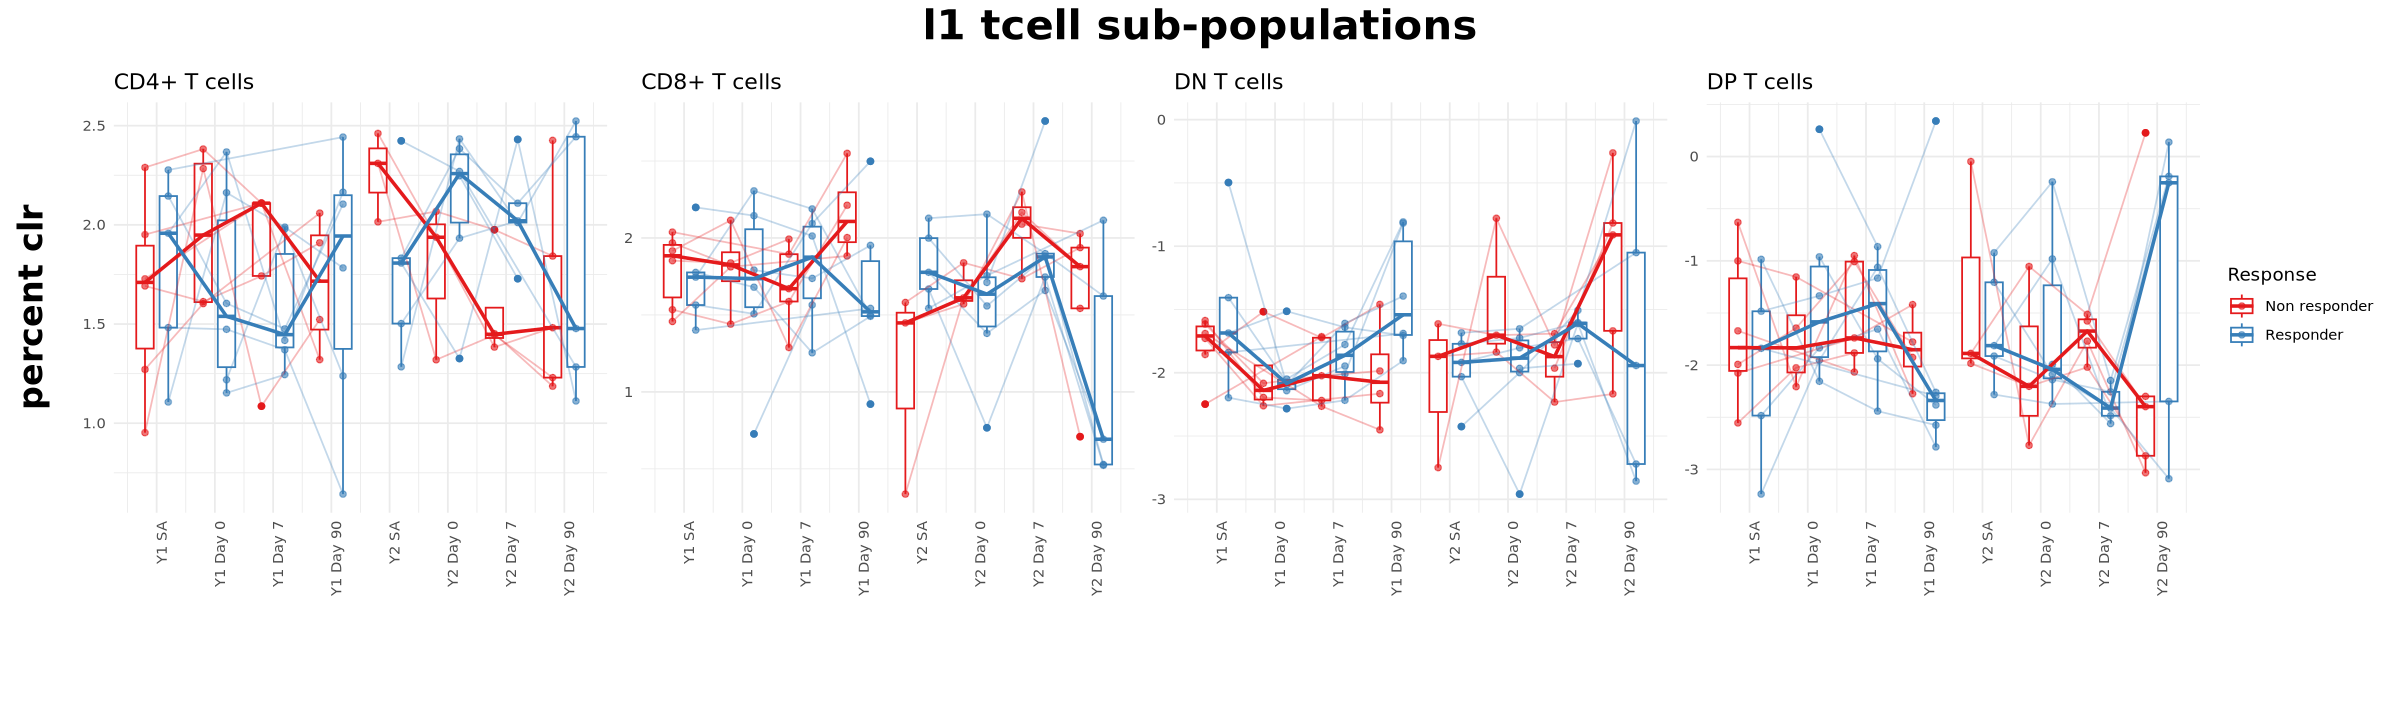

In [2]:
options(repr.plot.width = 20, repr.plot.height = 6)

library(ggplot2)      # Core plotting functionality
library(ggalluvial)   # Alluvial plot creation
library(dplyr)        # Data manipulation
library(RColorBrewer) # Color palette generation
library(gridExtra)    # Grid-based plot arrangements
library(rlang)        # Programming tools for R
library(tidyr)        # Data reshaping (pivot functions)
library(patchwork)    # Combining multiple plots into panels

df <- read.csv('/home/workspace/pbmc_flow/data/l1_frequency_clr_results.csv')

celltypes <- unique(df$population)

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0", 
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7", 
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

timepoints <- names(timepoint_labels)

df$Visit <- factor(df$Visit, levels = timepoints)
df$Year <- ifelse(grepl("Year 1", df$Visit), "Year 1", "Year 2")

plots <- lapply(seq_along(celltypes), function(x) {
    df_subset <- df[df$population == celltypes[[x]], ]
    
    df_subset$x_pos <- as.numeric(df_subset$Visit)
    df_subset$x_pos[df_subset$Response == "Non responder"] <- df_subset$x_pos[df_subset$Response == "Non responder"] - 0.2
    df_subset$x_pos[df_subset$Response == "Responder"] <- df_subset$x_pos[df_subset$Response == "Responder"] + 0.2
    
    p <- ggplot(df_subset, aes(x = x_pos, y = percent_clr, color = Response)) +
        geom_boxplot(aes(group = interaction(Visit, Response)), width = 0.3) +
        geom_point(alpha = 0.6) +
        geom_line(aes(group = interaction(Subject, Response, Year)), alpha = 0.3, size = 0.5) +
        stat_summary(fun = median, geom = "line", aes(group = interaction(Response, Year)), size = 1) +
        scale_x_continuous(breaks = 1:8, labels = timepoint_labels) +
        scale_color_manual(values = c("Non responder" = "#E41A1C", "Responder" = "#377EB8")) +
        theme_minimal() +
        theme(
            axis.text.x = element_text(angle = 90, hjust = 1),
            axis.title.x = element_text(margin = margin(t = 30), size = 20, face = "bold"),
            axis.title.y = element_text(size = 20, face = "bold", margin = margin(r = 20)),
            plot.margin = margin(t = 10, r = 5, b = 20, l = 5)
        ) +
        labs(title = paste(celltypes[[x]]), y = "percent clr", x = "") +
        scale_fill_brewer(type = "qual", palette = "Set2")
    
    return(p)
})

wrap_plots(plots, ncol = 4) + 
    plot_layout(guides = "collect", axis_title = "collect") +
    plot_annotation(
        title = "l1 tcell sub-populations",
        theme = theme(plot.title = element_text(hjust = 0.5, size = 25, face = "bold"))
    )

### level 2

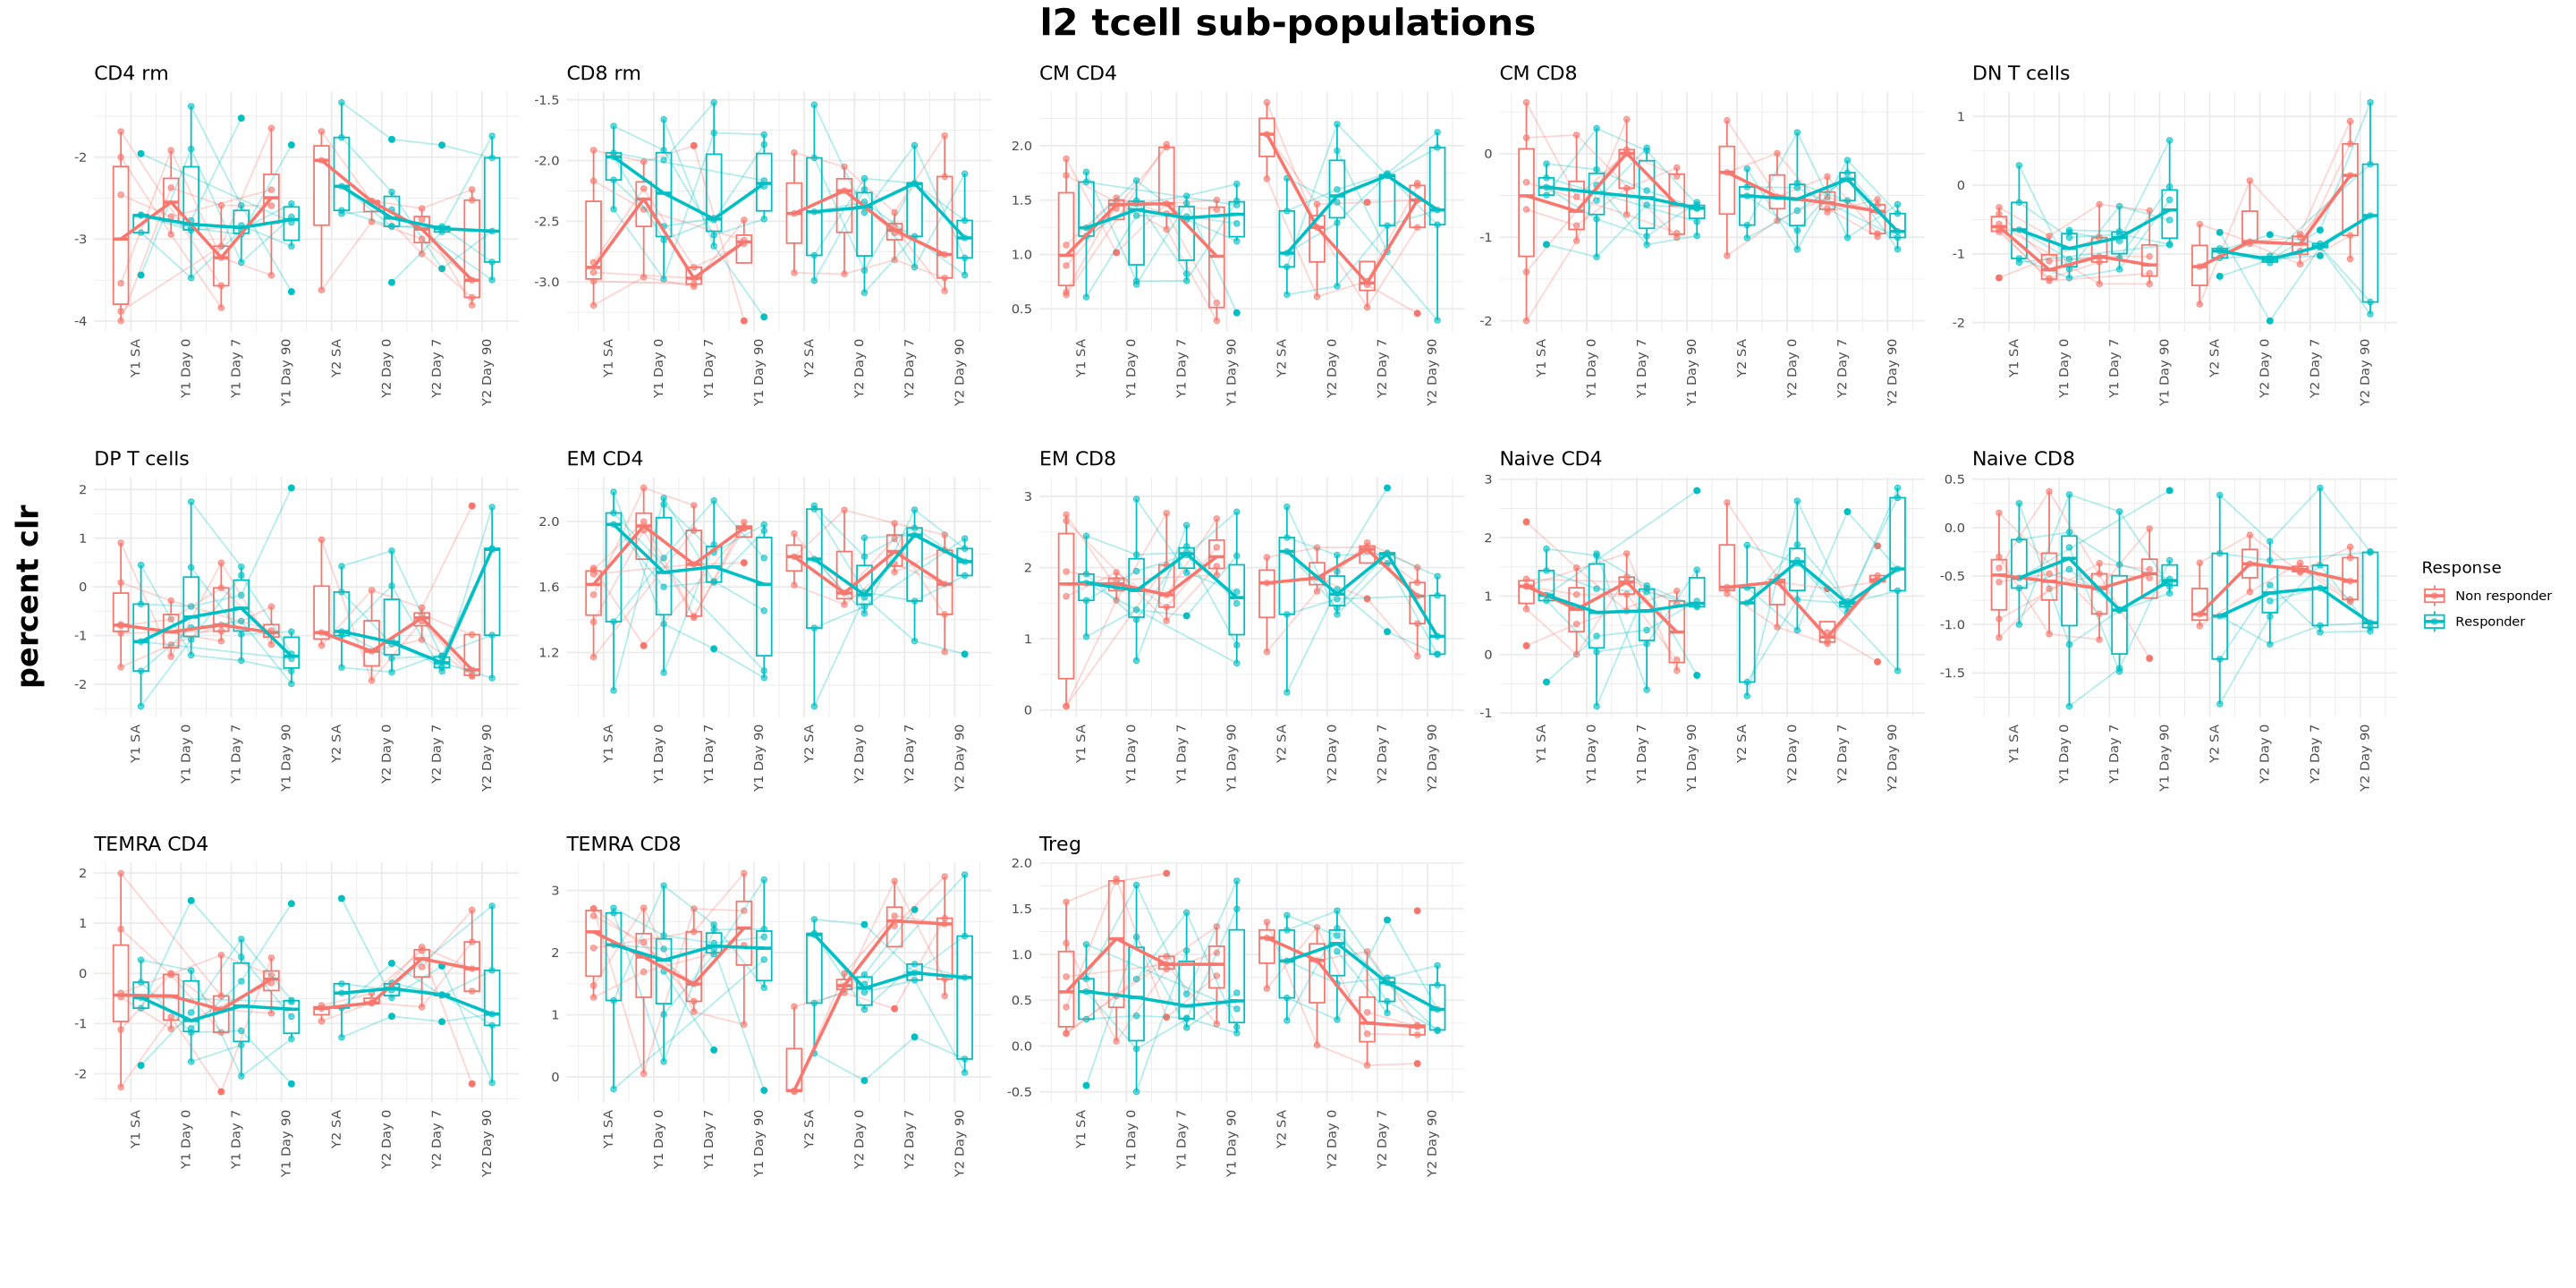

In [3]:
options(repr.plot.width = 24, repr.plot.height = 12)

library(ggplot2)      # Core plotting functionality
library(ggalluvial)   # Alluvial plot creation
library(dplyr)        # Data manipulation
library(RColorBrewer) # Color palette generation
library(gridExtra)    # Grid-based plot arrangements
library(rlang)        # Programming tools for R
library(tidyr)        # Data reshaping (pivot functions)
library(patchwork)    # Combining multiple plots into panels

df <- read.csv('/home/workspace/pbmc_flow/data/l2_frequency_clr_results.csv')

celltypes <- unique(df$population)

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0",
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7",
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

timepoints <- names(timepoint_labels)

df$Visit <- factor(df$Visit, levels = timepoints)
df$Year <- ifelse(grepl("Year 1", df$Visit), "Year 1", "Year 2")

plots <- lapply(seq_along(celltypes), function(x) {
    df_subset <- df[df$population == celltypes[[x]], ]
    
    df_subset$x_pos <- as.numeric(df_subset$Visit)
    df_subset$x_pos[df_subset$Response == "Non responder"] <- df_subset$x_pos[df_subset$Response == "Non responder"] - 0.2
    df_subset$x_pos[df_subset$Response == "Responder"] <- df_subset$x_pos[df_subset$Response == "Responder"] + 0.2
    
    p <- ggplot(df_subset, aes(x = x_pos, y = percent_clr, color = Response)) +
        geom_boxplot(aes(group = interaction(Visit, Response)), width = 0.3) +
        geom_point(alpha = 0.6) +
        geom_line(aes(group = interaction(Subject, Response, Year)), alpha = 0.3, size = 0.5) +
        stat_summary(fun = median, geom = "line", aes(group = interaction(Response, Year)), size = 1) +
        scale_x_continuous(breaks = 1:8, labels = timepoint_labels) +
        theme_minimal() +
        theme(
            axis.text.x = element_text(angle = 90, hjust = 1),
            axis.title.x = element_text(margin = margin(t = 30), size = 20, face = "bold"),
            axis.title.y = element_text(size = 20, face = "bold", margin = margin(r = 20)),
            plot.margin = margin(t = 10, r = 5, b = 20, l = 5)
        ) +
        labs(title = paste(celltypes[[x]]), y = "percent clr", x = "") +
        scale_fill_brewer(type = "qual", palette = "Set2")
    
    return(p)
})

wrap_plots(plots, ncol = 5) + 
    plot_layout(guides = "collect", axis_title = "collect") +
    plot_annotation(
        title = "l2 tcell sub-populations",
        theme = theme(plot.title = element_text(hjust = 0.5, size = 25, face = "bold"))
    )